In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.9.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
jogging=pd.read_csv('/content/drive/MyDrive/4_2_전기에너지하베스팅/CODE/11week/뛰기.csv') # csv 파일은 파일명 수정할것
jogging

,time,gFx,gFy,gFz,gFTotal
0,0.007771,0.061325,-0.789642,-0.600159,0.994
1,0.011567,0.022949,-0.801163,-0.586563,0.993
2,0.021336,0.003510,-0.800568,-0.617966,1.011
3,0.033118,-0.013702,-0.798370,-0.611191,1.006
4,0.041466,-0.025558,-0.789948,-0.612442,1.000
...,...,...,...,...,...
37220,370.982771,0.190353,-0.687744,-0.361053,0.800
37221,370.986505,0.204483,-0.696762,-0.368881,0.814
37222,370.996407,0.215622,-0.703812,-0.368393,0.823
37223,371.008568,0.212463,-0.709045,-0.360504,0.823


In [ ]:
jogging.head(12)  # 100Hz의 특징을 확인할 수 있다.(1초에 100개의 data수집)

,time,gFx,gFy,gFz,gFTotal
0,0.007771,0.061325,-0.789642,-0.600159,0.994
1,0.011567,0.022949,-0.801163,-0.586563,0.993
2,0.021336,0.003510,-0.800568,-0.617966,1.011
3,0.033118,-0.013702,-0.798370,-0.611191,1.006
4,0.041466,-0.025558,-0.789948,-0.612442,1.000
5,0.051011,-0.028976,-0.781006,-0.612259,0.993
6,0.061449,-0.030380,-0.771942,-0.611343,0.985
7,0.072445,-0.017944,-0.763672,-0.615280,0.981
8,0.083390,0.013275,-0.766144,-0.620483,0.986
9,0.092197,0.039917,-0.764816,-0.636566,0.996


In [ ]:
walking=pd.read_csv('/content/drive/MyDrive/4_2_전기에너지하베스팅/CODE/11week/걷기.csv')
walking

,time,gFx,gFy,gFz,gFTotal
0,0.008431,-0.119949,-0.858963,-0.561295,1.033
1,0.017661,-0.144073,-0.868179,-0.569443,1.048
2,0.027832,-0.150024,-0.857712,-0.574188,1.043
3,0.037942,-0.154800,-0.847992,-0.573059,1.035
4,0.047956,-0.145584,-0.834686,-0.570267,1.021
...,...,...,...,...,...
74300,740.537377,0.061050,-0.796814,-0.756821,1.101
74301,740.547404,0.059708,-0.827240,-0.751831,1.119
74302,740.557299,0.056305,-0.862640,-0.744583,1.141
74303,740.567334,0.044540,-0.891907,-0.734299,1.156


In [ ]:
sitting = pd.read_csv('/content/drive/MyDrive/4_2_전기에너지하베스팅/CODE/11week/앉기.csv')
sitting

,time,gFx,gFy,gFz,gFTotal
0,0.008171,0.038284,-0.406204,-0.837601,0.932
1,0.012029,0.021240,-0.391968,-0.799347,0.891
2,0.022431,-0.003479,-0.409805,-0.871857,0.963
3,0.032109,0.000992,-0.422150,-0.919724,1.012
4,0.043274,0.035660,-0.411850,-0.920349,1.009
...,...,...,...,...,...
27844,277.543395,-0.193604,-0.317322,-0.972015,1.041
27845,277.553907,-0.182327,-0.311172,-0.981766,1.046
27846,277.562589,-0.175552,-0.300262,-0.963791,1.025
27847,277.571349,-0.182007,-0.280548,-0.908310,0.968


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jogging.insert(0, 'activity', 'jogging')  #조깅 데이터프레임에 feature_names activity로 jogging을 추가해줌 
walking.insert(0, 'activity', 'walking') #워킹 데이터프레임에 feature_names activity로 walking을 추가해줌 
sitting.insert(0, 'activity', 'sitting') #시팅 데이터프레임에 feature_names activity로 sitting을 추가해줌 

In [ ]:
jogging

,activity,time,gFx,gFy,gFz,gFTotal
0,jogging,0.007771,0.061325,-0.789642,-0.600159,0.994
1,jogging,0.011567,0.022949,-0.801163,-0.586563,0.993
2,jogging,0.021336,0.003510,-0.800568,-0.617966,1.011
3,jogging,0.033118,-0.013702,-0.798370,-0.611191,1.006
4,jogging,0.041466,-0.025558,-0.789948,-0.612442,1.000
...,...,...,...,...,...,...
37220,jogging,370.982771,0.190353,-0.687744,-0.361053,0.800
37221,jogging,370.986505,0.204483,-0.696762,-0.368881,0.814
37222,jogging,370.996407,0.215622,-0.703812,-0.368393,0.823
37223,jogging,371.008568,0.212463,-0.709045,-0.360504,0.823


In [ ]:
walking

,activity,time,gFx,gFy,gFz,gFTotal
0,walking,0.008431,-0.119949,-0.858963,-0.561295,1.033
1,walking,0.017661,-0.144073,-0.868179,-0.569443,1.048
2,walking,0.027832,-0.150024,-0.857712,-0.574188,1.043
3,walking,0.037942,-0.154800,-0.847992,-0.573059,1.035
4,walking,0.047956,-0.145584,-0.834686,-0.570267,1.021
...,...,...,...,...,...,...
74300,walking,740.537377,0.061050,-0.796814,-0.756821,1.101
74301,walking,740.547404,0.059708,-0.827240,-0.751831,1.119
74302,walking,740.557299,0.056305,-0.862640,-0.744583,1.141
74303,walking,740.567334,0.044540,-0.891907,-0.734299,1.156


In [ ]:
sitting

,activity,time,gFx,gFy,gFz,gFTotal
0,sitting,0.008171,0.038284,-0.406204,-0.837601,0.932
1,sitting,0.012029,0.021240,-0.391968,-0.799347,0.891
2,sitting,0.022431,-0.003479,-0.409805,-0.871857,0.963
3,sitting,0.032109,0.000992,-0.422150,-0.919724,1.012
4,sitting,0.043274,0.035660,-0.411850,-0.920349,1.009
...,...,...,...,...,...,...
27844,sitting,277.543395,-0.193604,-0.317322,-0.972015,1.041
27845,sitting,277.553907,-0.182327,-0.311172,-0.981766,1.046
27846,sitting,277.562589,-0.175552,-0.300262,-0.963791,1.025
27847,sitting,277.571349,-0.182007,-0.280548,-0.908310,0.968


# 데이터 모음 (위 3개 모음)

In [ ]:
result_1 = walking.append(jogging)
result= result_1.append(sitting)
result = result.drop(['gFTotal'],axis=1)

In [ ]:
result['activity'].unique()

array(['walking', 'jogging', 'sitting'], dtype=object)

In [ ]:
result['activity'].value_counts()

walking    74305
jogging    37225
sitting    27849
Name: activity, dtype: int64

In [ ]:
result['gFx']=result['gFx'].astype('float')
result['gFy']=result['gFy'].astype('float')
result['gFz']=result['gFz'].astype('float')

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139379 entries, 0 to 27848
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   activity  139379 non-null  object 
 1   time      139379 non-null  float64
 2   gFx       139379 non-null  float64
 3   gFy       139379 non-null  float64
 4   gFz       139379 non-null  float64
dtypes: float64(4), object(1)
memory usage: 6.4+ MB


In [ ]:
activities = result['activity'].value_counts().index

In [ ]:
activities

Index(['walking', 'jogging', 'sitting'], dtype='object')

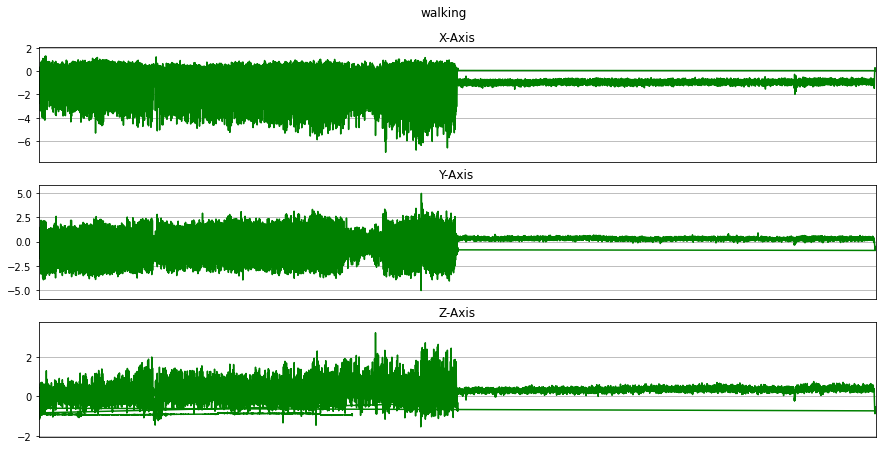

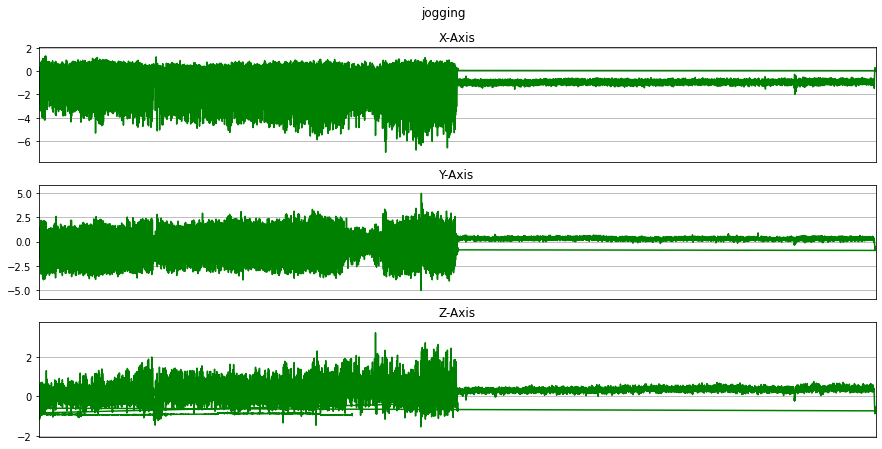

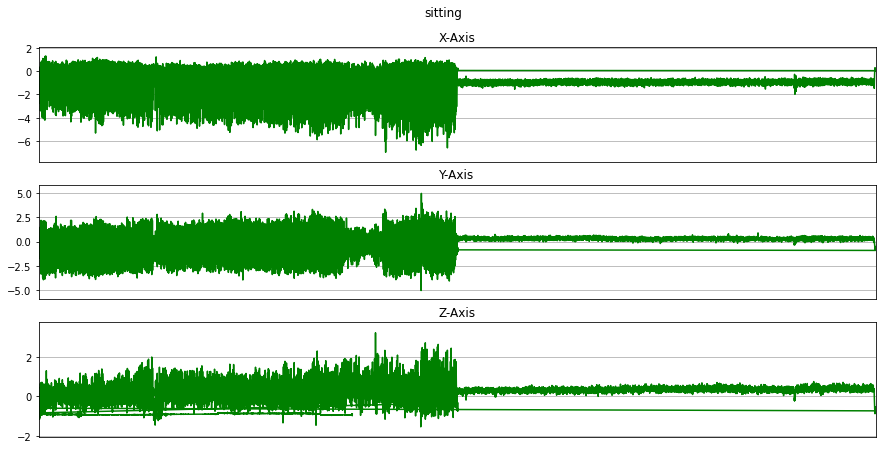

In [ ]:
Fs=100
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True) # x축을 공유하겠다는 뜻
    plot_axis(ax0, result['time'], result['gFx'], 'X-Axis')
    plot_axis(ax1, result['time'], result['gFy'], 'Y-Axis')
    plot_axis(ax2, result['time'], result['gFz'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
for activity in activities:
    data_for_plot = result[(result['activity'] == activity)][:Fs*10] # 10초정도에 해당하는 데이터를 그리시오
    plot_activity(activity, data_for_plot)  

In [ ]:
walking = result[result['activity']=='walking'].head(27849).copy()
jogging  = result[result['activity']=='jogging'].head(27849).copy()
sitting = result[result['activity']=='sitting'].head(27849).copy()

In [ ]:
walking.head(5)

,activity,time,gFx,gFy,gFz
0,walking,0.008431,-0.119949,-0.858963,-0.561295
1,walking,0.017661,-0.144073,-0.868179,-0.569443
2,walking,0.027832,-0.150024,-0.857712,-0.574188
3,walking,0.037942,-0.154800,-0.847992,-0.573059
4,walking,0.047956,-0.145584,-0.834686,-0.570267


In [ ]:
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([walking, jogging,sitting])

In [ ]:
balanced_data

,activity,time,gFx,gFy,gFz
0,walking,0.008431,-0.119949,-0.858963,-0.561295
1,walking,0.017661,-0.144073,-0.868179,-0.569443
2,walking,0.027832,-0.150024,-0.857712,-0.574188
3,walking,0.037942,-0.154800,-0.847992,-0.573059
4,walking,0.047956,-0.145584,-0.834686,-0.570267
...,...,...,...,...,...
27844,sitting,277.543395,-0.193604,-0.317322,-0.972015
27845,sitting,277.553907,-0.182327,-0.311172,-0.981766
27846,sitting,277.562589,-0.175552,-0.300262,-0.963791
27847,sitting,277.571349,-0.182007,-0.280548,-0.908310


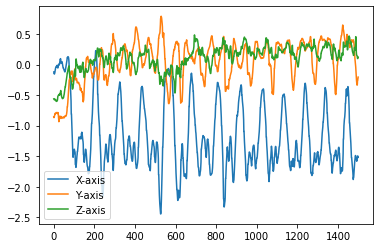

In [ ]:
#3축데이터 한번에 보기 (워키데이터중 100개 )  20헤르츠의 센서를 사용했으니 5초를 보는 것이 된다 
Fs=100
plt.plot(np.arange(0,1500),balanced_data.gFx[balanced_data['activity']=="walking"][:1500], label='X-axis') #100개데이타 마지막 69의 walkig부분100개데이타
plt.plot(np.arange(0,1500),balanced_data.gFy[balanced_data['activity']=="walking"][:1500], label='Y-axis')
plt.plot(np.arange(0,1500),balanced_data.gFz[balanced_data['activity']=="walking"][:1500], label='Z-axis')
plt.legend()

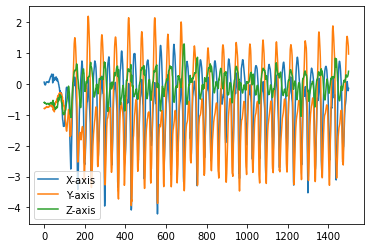

In [ ]:
Fs=100
plt.plot(np.arange(0,1500),balanced_data.gFx[balanced_data['activity']=="jogging"][:1500], label='X-axis') #100개데이타 마지막 69의 walkig부분100개데이타
plt.plot(np.arange(0,1500),balanced_data.gFy[balanced_data['activity']=="jogging"][:1500], label='Y-axis')#3초 동안의 데이터
plt.plot(np.arange(0,1500),balanced_data.gFz[balanced_data['activity']=="jogging"][:1500], label='Z-axis')
plt.legend()

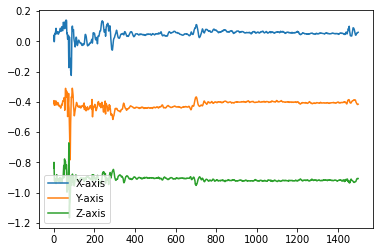

In [ ]:
Fs=100
plt.plot(np.arange(0,Fs*15),balanced_data.gFx[balanced_data['activity']=="sitting"][:Fs*15], label='X-axis') #100개데이타 마지막 69의 walkig부분100개데이타
plt.plot(np.arange(0,Fs*15),balanced_data.gFy[balanced_data['activity']=="sitting"][:Fs*15], label='Y-axis')
plt.plot(np.arange(0,Fs*15),balanced_data.gFz[balanced_data['activity']=="sitting"][:Fs*15], label='Z-axis')
plt.legend()

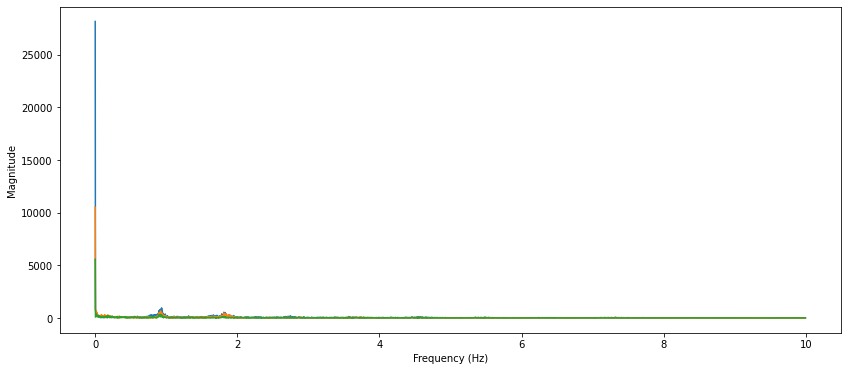

In [ ]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
walking_signal_x= balanced_data.gFx[balanced_data['activity']=="walking"]
walking_signal_y= balanced_data.gFy[balanced_data['activity']=="walking"]
walking_signal_z= balanced_data.gFz[balanced_data['activity']=="walking"]

walking_signal_x= walking_signal_x.to_numpy()
walking_signal_y= walking_signal_y.to_numpy()
walking_signal_z= walking_signal_z.to_numpy()

walking_ft_x = sp.fft.fft(walking_signal_x)
walking_ft_y = sp.fft.fft(walking_signal_y)
walking_ft_z= sp.fft.fft(walking_signal_z)

walking_magnitude_x = np.absolute(walking_ft_x)
walking_magnitude_y = np.absolute(walking_ft_y)
walking_magnitude_z = np.absolute(walking_ft_z)


walking_frequency_x = np.linspace(0, 100, len(walking_magnitude_x)) 
walking_frequency_y = np.linspace(0, 100, len(walking_magnitude_y)) 
walking_frequency_z = np.linspace(0, 100, len(walking_magnitude_z)) 

f= len(walking_magnitude_x)/10
f= int(f)



# plot spectrum
plt.figure(figsize=(14, 6))
plt.plot(walking_frequency_x[0:f], walking_magnitude_x[0:f]) 
plt.plot(walking_frequency_y[0:f], walking_magnitude_y[0:f]) 
plt.plot(walking_frequency_z[0:f], walking_magnitude_z[0:f]) 
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
27849*3

83547

In [ ]:
balanced_data.shape

(83547, 5)

In [ ]:
balanced_data['activity'].value_counts()

walking    27849
jogging    27849
sitting    27849
Name: activity, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])

In [ ]:
label

LabelEncoder()

In [ ]:
balanced_data

,activity,time,gFx,gFy,gFz,label
0,walking,0.008431,-0.119949,-0.858963,-0.561295,2
1,walking,0.017661,-0.144073,-0.868179,-0.569443,2
2,walking,0.027832,-0.150024,-0.857712,-0.574188,2
3,walking,0.037942,-0.154800,-0.847992,-0.573059,2
4,walking,0.047956,-0.145584,-0.834686,-0.570267,2
...,...,...,...,...,...,...
27844,sitting,277.543395,-0.193604,-0.317322,-0.972015,1
27845,sitting,277.553907,-0.182327,-0.311172,-0.981766,1
27846,sitting,277.562589,-0.175552,-0.300262,-0.963791,1
27847,sitting,277.571349,-0.182007,-0.280548,-0.908310,1


In [ ]:
label.classes_

array(['jogging', 'sitting', 'walking'], dtype=object)

In [ ]:
X = balanced_data[['gFx', 'gFy', 'gFz']]
y = balanced_data['label']

In [ ]:
y

0        2
1        2
2        2
3        2
4        2
        ..
27844    1
27845    1
27846    1
27847    1
27848    1
Name: label, Length: 83547, dtype: int64

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.71172513, -0.59574691, -0.66315284],
       [ 0.68392441, -0.60510562, -0.67744344],
       [ 0.67706655, -0.59447636, -0.68576624],
       ...,
       [ 0.64764807, -0.02841396, -1.36906578],
       [ 0.64020993, -0.008395  , -1.27176123],
       [ 0.61267298, -0.00363817, -1.24339411]])

In [ ]:
scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

In [ ]:
scaled_X

,x,y,z,label
0,0.711725,-0.595747,-0.663153,2
1,0.683924,-0.605106,-0.677443,2
2,0.677067,-0.594476,-0.685766,2
3,0.671563,-0.584606,-0.683786,2
4,0.682184,-0.571095,-0.678889,2
...,...,...,...,...
83542,0.626846,-0.045737,-1.383490,1
83543,0.639841,-0.039493,-1.400591,1
83544,0.647648,-0.028414,-1.369066,1
83545,0.640210,-0.008395,-1.271761,1


In [ ]:
Fs=100 # 20 Hz 로 수집된 데이터
frame_size =Fs*4 #80 samples  , 4초 정도 면 6가지 동작을 구분하기에 충분하겠다
hop_size=Fs*2 #40 samples

In [ ]:
scaled_X

,x,y,z,label
0,0.711725,-0.595747,-0.663153,2
1,0.683924,-0.605106,-0.677443,2
2,0.677067,-0.594476,-0.685766,2
3,0.671563,-0.584606,-0.683786,2
4,0.682184,-0.571095,-0.678889,2
...,...,...,...,...
83542,0.626846,-0.045737,-1.383490,1
83543,0.639841,-0.039493,-1.400591,1
83544,0.647648,-0.028414,-1.369066,1
83545,0.640210,-0.008395,-1.271761,1


In [ ]:
import scipy.stats as stats

In [ ]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size , hop_size):
        x = df['x'].values[i: i + frame_size]  # 0~ 79  :80개로 이루어진 데이타 , 그 다음 프레임의 샘플 40~ 119
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels



In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape 

((332, 400, 3), (84, 400, 3))

In [ ]:
X_train[0].shape, X_test[0].shape

((400, 3), (400, 3))

In [ ]:
X_train = X_train.reshape(332, 400, 3, 1)
X_test = X_test.reshape(84, 400, 3, 1)

In [ ]:
X_train.shape, X_test.shape 

((332, 400, 3, 1), (84, 400, 3, 1))

In [ ]:
X_train[0].shape, X_test[0].shape

((400, 3, 1), (400, 3, 1))

In [ ]:
X_train

array([[[[ 5.95264556e-01],
         [ 5.95176635e-01],
         [ 5.93629220e-01]],

        [[ 5.93787478e-01],
         [ 5.93857815e-01],
         [ 5.95844837e-01]],

        [[ 5.96688881e-01],
         [ 5.98218712e-01],
         [ 5.97409836e-01]],

        ...,

        [[-1.27344720e+00],
         [-1.27114571e+00],
         [-1.27066401e+00]],

        [[-1.27122600e+00],
         [-1.27433032e+00],
         [-1.27160066e+00]],

        [[-1.27267111e+00],
         [-1.27352748e+00],
         [-1.27053020e+00]]],


       [[[ 6.61311046e-01],
         [ 6.61926495e-01],
         [ 6.62049585e-01]],

        [[ 6.62629866e-01],
         [ 6.61944079e-01],
         [ 6.62700203e-01]],

        [[ 6.62770540e-01],
         [ 6.63139809e-01],
         [ 6.61609978e-01]],

        ...,

        [[-1.31436542e+00],
         [-1.31353582e+00],
         [-1.31490065e+00]],

        [[-1.31661338e+00],
         [-1.31971770e+00],
         [-1.32054731e+00]],

        [[-1.31864725e+0

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))  # 64로 해보기
model.add(Dropout(0.3))   # 0.5 로 해보기

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 399, 2, 16)        80        
                                                                 
 dropout (Dropout)           (None, 399, 2, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 398, 1, 32)        2080      
                                                                 
 dropout_1 (Dropout)         (None, 398, 1, 32)        0         
                                                                 
 flatten (Flatten)           (None, 12736)             0         
                                                                 
 dense (Dense)               (None, 128)               1630336   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2, 
                    verbose=1)

Epoch 1/20
9/9 [==============================] - 8s 37ms/step - loss: 0.2687 - accuracy: 0.8679 - val_loss: 1.8207e-04 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 0.0323 - accuracy: 0.9887 - val_loss: 5.7467e-06 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.9925 - val_loss: 4.7968e-06 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 0.9962 - val_loss: 2.5123e-06 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 0s 9ms/step - loss: 9.2590e-04 - accuracy: 1.0000 - val_loss: 1.2028e-06 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 0s 13ms/step - loss: 3.2220e-04 - accuracy: 1.0000 - val_loss: 7.4372e-07 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 0s 13ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.6366e-07 - val_accuracy: 1.

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

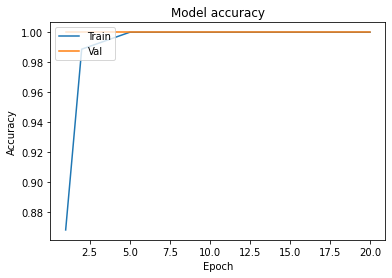

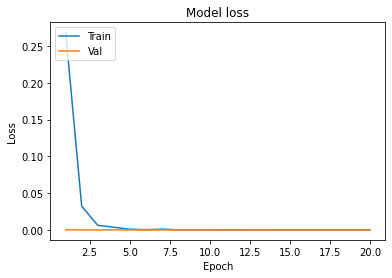

In [ ]:
plot_learningCurve(history, 20)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
y_pred_1 = model.predict(X_test)
y_pred_1.shape

3/3 [==============================] - 0s 18ms/step


(84, 3)

In [ ]:
y_pred = np.argmax(y_pred_1, axis=1)
y_pred.shape

(84,)

In [ ]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[28,  0,  0],
       [ 0, 28,  0],
       [ 0,  0, 28]])

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8cb28487d0>)

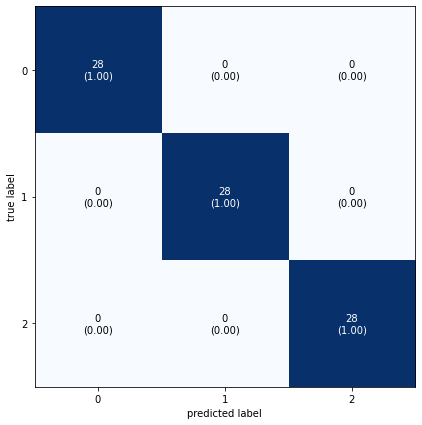

In [ ]:
plot_confusion_matrix(conf_mat=mat,  show_normed=True, figsize=(7,7))

# 4개중 3개 동작으로 다시 분리 해보기

In [ ]:
df_walking = pd.DataFrame()
df_walking = result[result.activity== "walking"]

df_jogging=pd.DataFrame()
df_jogging=result[result.activity=="jogging"]

df_p_jogging=pd.DataFrame()
df_p_jogging=result[result.activity=="sitting"]

In [ ]:
df_walking

,activity,time,gFx,gFy,gFz,gFTotal
0,walking,0.008431,-0.119949,-0.858963,-0.561295,1.033
1,walking,0.017661,-0.144073,-0.868179,-0.569443,1.048
2,walking,0.027832,-0.150024,-0.857712,-0.574188,1.043
3,walking,0.037942,-0.154800,-0.847992,-0.573059,1.035
4,walking,0.047956,-0.145584,-0.834686,-0.570267,1.021
...,...,...,...,...,...,...
74300,walking,740.537377,0.061050,-0.796814,-0.756821,1.101
74301,walking,740.547404,0.059708,-0.827240,-0.751831,1.119
74302,walking,740.557299,0.056305,-0.862640,-0.744583,1.141
74303,walking,740.567334,0.044540,-0.891907,-0.734299,1.156
